In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import numpy as np
from scipy import stats
from datetime import date
from IPython.display import display, HTML, Markdown, Javascript
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
wastewater = pd.read_csv('~/bin/Viral Gene Copies Persons.csv', encoding="utf-16", sep='\t', thousands=',', parse_dates=['Date'], infer_datetime_format=True)  

In [3]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(wastewater)

,Index,Wastewater Treatment Plant,County,Date,Population Served,Viral Gene Copies Per Person,Viral Gene Copies/L
0,1,Albemarle (CDC Contract),Stanly,2023-07-31,20000,164211596,370771
1,2,Albemarle (CDC Contract),Stanly,2023-07-26,20000,82636850,164138
...,...,...,...,...,...,...,...
7973,7974,Winston Salem - Salem,Forsyth,2021-06-23,178000,66976,0
7974,7975,Winston Salem - Salem,Forsyth,2021-06-19,178000,240667,0


In [4]:
wastewater_counties = wastewater.query('County == "Durham" | County == "Orange" | County == "Wake"')

with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display(wastewater_counties)
    display(wastewater['County'].unique())

,Index,Wastewater Treatment Plant,County,Date,Population Served,Viral Gene Copies Per Person,Viral Gene Copies/L
109,110,Cary 1,Wake,2023-08-23,84189,48341346,159990
110,111,Cary 1,Wake,2023-08-18,84189,58280834,188127
...,...,...,...,...,...,...,...
6557,6558,South Durham,Durham,2021-01-09,108105,10454320,34357
6558,6559,South Durham,Durham,2021-01-06,108105,6952582,21489


array(['Stanly', 'Wake', 'Orange', 'Mecklenburg', 'Swain,jackson',
       'Vance', 'Wilson', 'Union', 'Gaston', 'Cumberland', 'Guilford',
       'Pitt', 'Henderson', 'Catawba', 'Onslow', 'Lincoln',
       'Lenoir,greene', 'Scotland', 'Mcdowell', 'Surry',
       'Buncombe,Henderson', 'Cabarrus', 'New Hanover', 'Carteret',
       'Durham', 'Chatham', 'Halifax,Northampton', 'Rowan', 'Mitchell',
       'Watauga', 'Jackson', 'Duplin,pender', 'Forsyth'], dtype=object)

In [5]:
wastewater_counties['year'] = wastewater_counties['Date'].dt.isocalendar().year
wastewater_counties['week'] = wastewater_counties['Date'].dt.isocalendar().week

In [6]:
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(wastewater_counties)

,Index,Wastewater Treatment Plant,County,Date,Population Served,Viral Gene Copies Per Person,Viral Gene Copies/L,year,week
109,110,Cary 1,Wake,2023-08-23,84189,48341346,159990,2023,34
110,111,Cary 1,Wake,2023-08-18,84189,58280834,188127,2023,33
111,112,Cary 1,Wake,2023-08-16,84189,39756470,128518,2023,33
112,113,Cary 1,Wake,2023-08-11,84189,24764432,80877,2023,32
113,114,Cary 1,Wake,2023-08-09,84189,26520210,81580,2023,32
...,...,...,...,...,...,...,...,...,...
6554,6555,South Durham,Durham,2021-01-20,108105,7293924,28931,2021,3
6555,6556,South Durham,Durham,2021-01-16,108105,9457961,35587,2021,2
6556,6557,South Durham,Durham,2021-01-13,108105,8714805,30241,2021,2
6557,6558,South Durham,Durham,2021-01-09,108105,10454320,34357,2021,1


In [7]:
wastewater_filtered_new = wastewater_counties[wastewater_counties['Viral Gene Copies Per Person'].transform(lambda x : (x<x.quantile(0.97))&(x>(x.quantile(0.005)))).eq(1)]
wastewater_triangle_new = wastewater_filtered_new.groupby(['year', 'week']).agg({'Viral Gene Copies Per Person' : 'mean'})
wastewater_noindex = wastewater_triangle_new.reset_index()

with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(wastewater_triangle_new)
    display(wastewater_noindex)

Viral Gene Copies Per Person
year week                              
2021 1                     1.223145e+07
     2                     1.411457e+07
     3                     7.997574e+06
     4                     7.104690e+06
     5                     4.367802e+06
...                                 ...
2023 30                    2.945539e+07
     31                    2.763402e+07
     32                    2.572977e+07
     33                    3.220882e+07
     34                    3.733251e+07

[138 rows x 1 columns]

,year,week,Viral Gene Copies Per Person
0,2021,1,1.223145e+07
1,2021,2,1.411457e+07
2,2021,3,7.997574e+06
3,2021,4,7.104690e+06
4,2021,5,4.367802e+06
...,...,...,...
133,2023,30,2.945539e+07
134,2023,31,2.763402e+07
135,2023,32,2.572977e+07
136,2023,33,3.220882e+07


In [8]:
wastewater_pivot = wastewater_noindex.pivot(index='week', columns='year')
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(wastewater_pivot)

Viral Gene Copies Per Person                            
year                         2021          2022          2023
week                                                         
1                    1.223145e+07  5.549937e+07  4.116488e+07
2                    1.411457e+07  4.823369e+07  2.701136e+07
3                    7.997574e+06  3.595260e+07  2.701292e+07
4                    7.104690e+06  3.471136e+07  2.888193e+07
5                    4.367802e+06  2.083767e+07  3.161095e+07
...                           ...           ...           ...
48                   4.653752e+06  1.996490e+07           NaN
49                   5.724806e+06  2.224020e+07           NaN
50                   9.486309e+06  3.290209e+07           NaN
51                   1.789986e+07  2.942140e+07           NaN
52                   4.030522e+07  4.698141e+07           NaN

[52 rows x 3 columns]

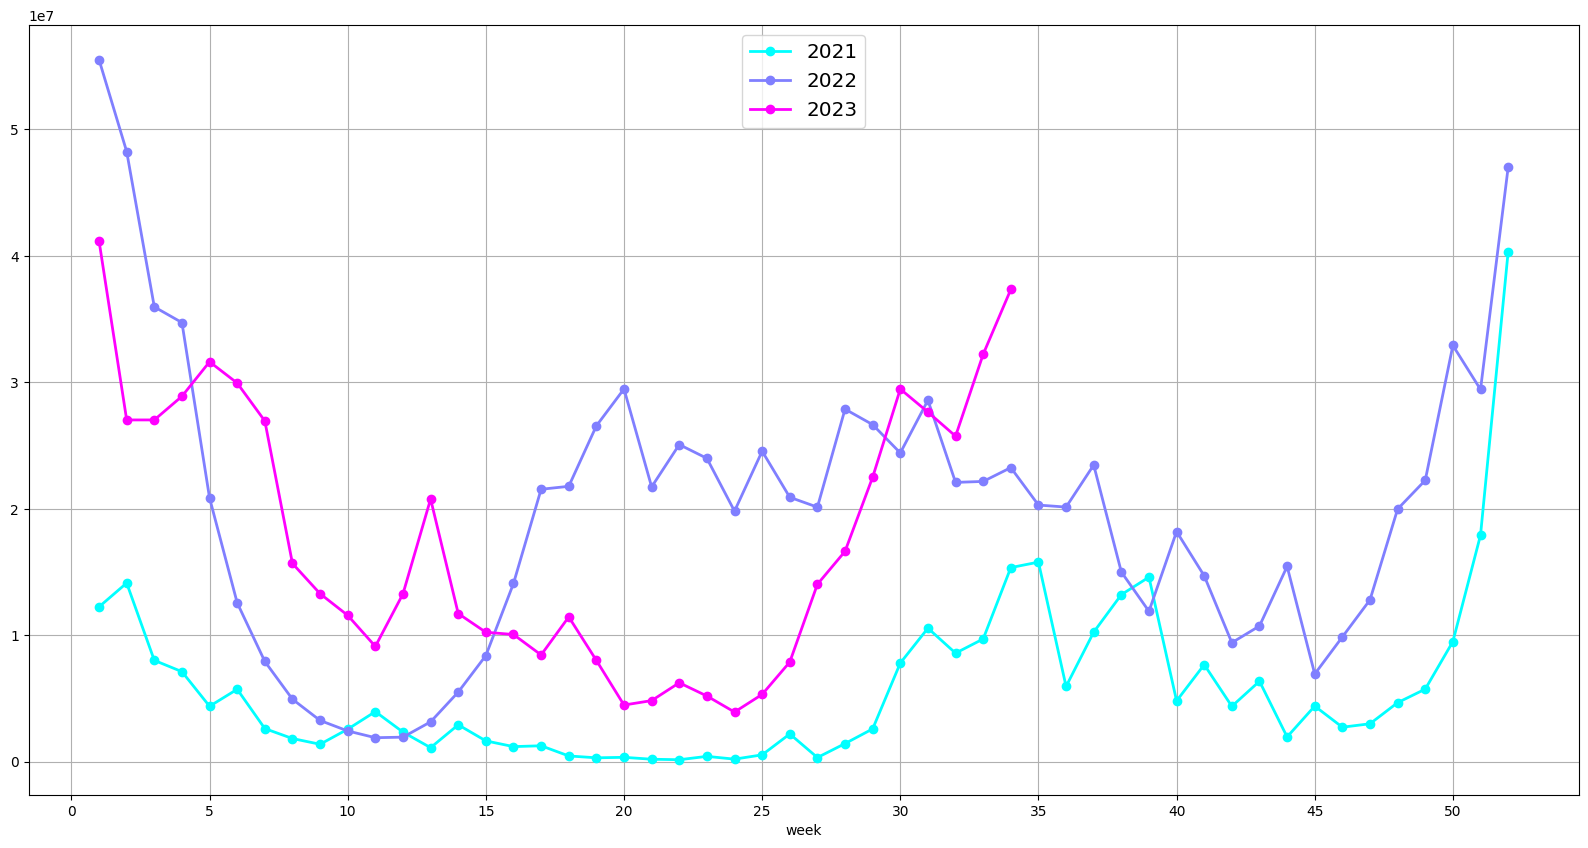

In [9]:
ax = wastewater_pivot.plot(figsize=(20,10), rot=0, grid=True, colormap='cool', lw=2, xticks = [0,5,10,15,20,25,30,35,40,45,50], style='o-')
ax.legend(['2021','2022','2023'], loc=9, fontsize='x-large')

In [10]:
wastewater_2023 = wastewater_counties[(wastewater_counties['Date'] >= '2023-01-01')]
wastewater_grouped = wastewater_2023.groupby([pd.Grouper(key='Date', freq='7D'), 'Wastewater Treatment Plant']).agg({'Viral Gene Copies Per Person' : 'mean', 'County' : 'first'})
wastewater_filtered = wastewater_grouped[wastewater_grouped['Viral Gene Copies Per Person'].transform(lambda x : (x<x.quantile(0.99))&(x>(x.quantile(0.001)))).eq(1)]
wastewater_county = wastewater_filtered.groupby(['Date', 'County']).agg({'Viral Gene Copies Per Person' : 'mean'})

with pd.option_context('display.max_rows', 60, 'display.max_columns', None):
    display(wastewater_filtered.round(0))
    display(wastewater_county)


Viral Gene Copies Per Person  County
Date       Wastewater Treatment Plant                                      
2023-01-03 Cary 1                                        66509952.0    Wake
           Chapel Hill - Carrboro                        27171118.0  Orange
           North Durham                                  64702817.0  Durham
           Raleigh                                       44316712.0    Wake
           Raleigh 2                                     38050657.0    Wake
...                                                             ...     ...
2023-08-22 Cary 2                                        19226001.0    Wake
           Cary 3                                        46955725.0    Wake
           North Durham                                  11468598.0  Durham
           Raleigh                                       24928561.0    Wake
           Raleigh 2                                     33317260.0    Wake

[299 rows x 2 columns]

Viral Gene Copies Per Person
Date       County                              
2023-01-03 Durham                   64702817.00
           Orange                   27171118.00
           Wake                     41225224.25
2023-01-10 Durham                   46521157.25
           Orange                   20685676.00
...                                         ...
2023-08-15 Durham                   26178746.00
           Orange                   31221440.00
           Wake                     34383405.00
2023-08-22 Durham                   11468598.00
           Wake                     34553778.60

[101 rows x 1 columns]

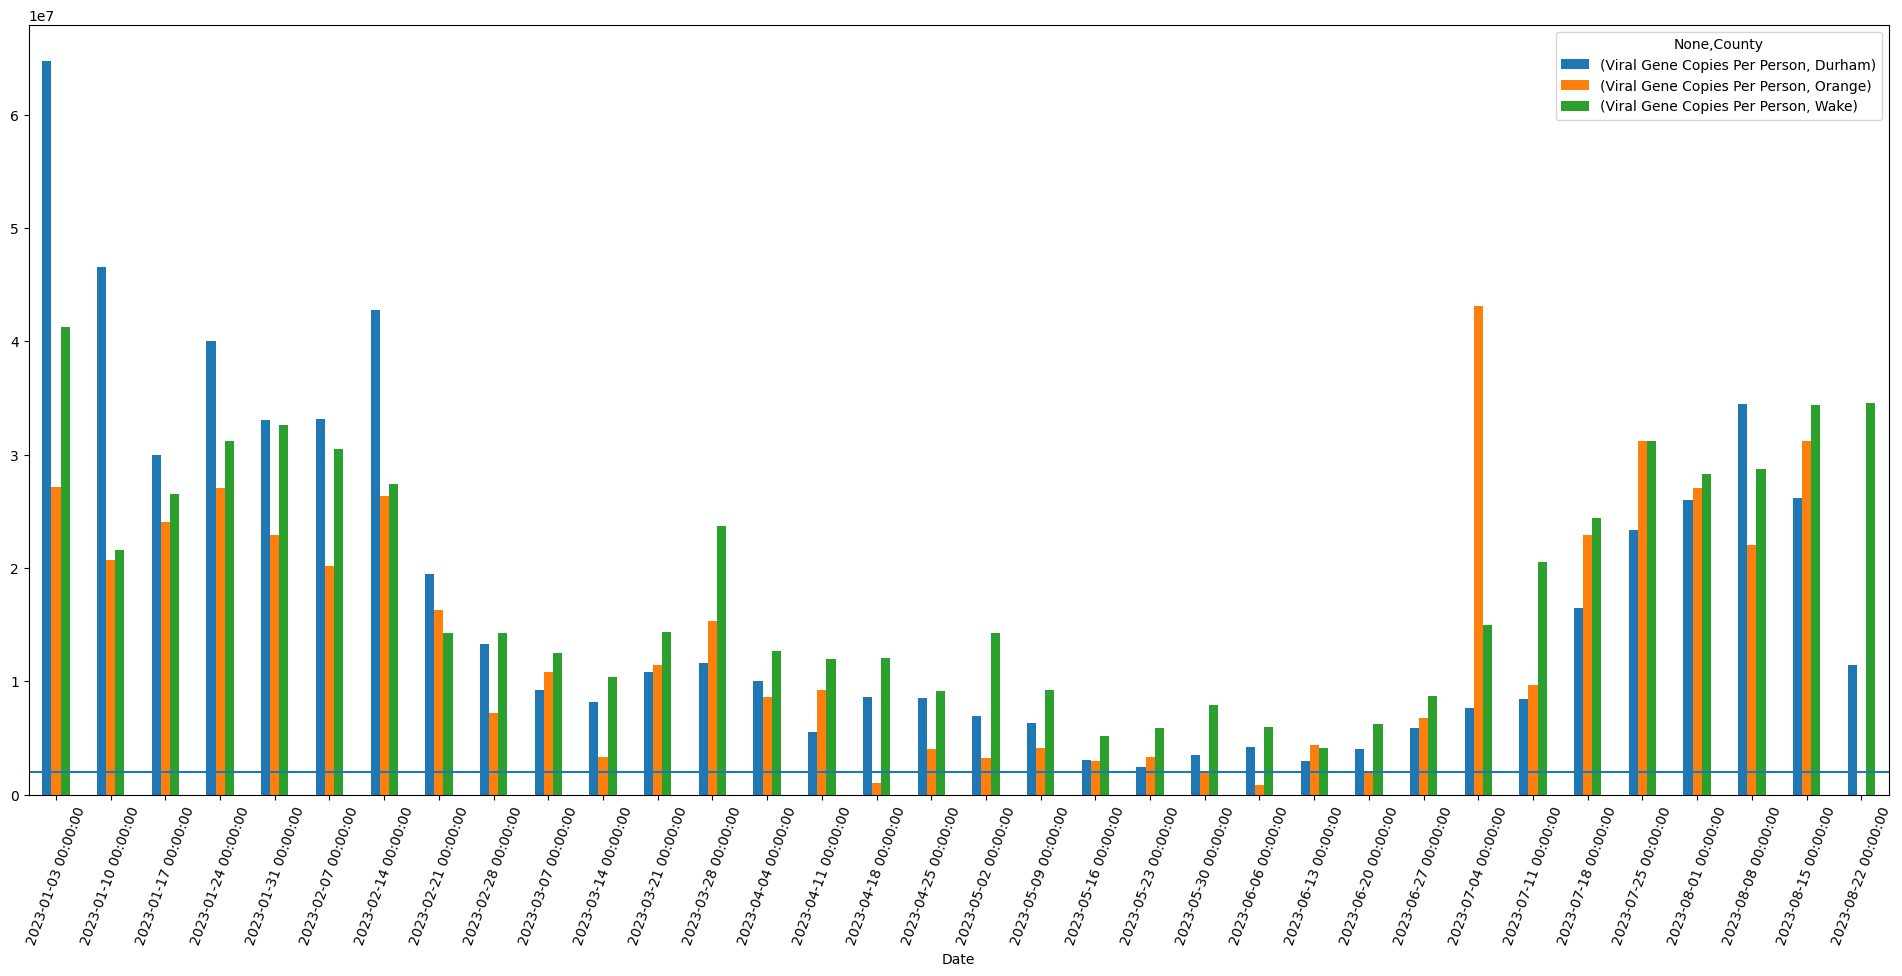

In [11]:
ax = wastewater_county.unstack().plot.bar(figsize=(24,10), rot=70).axhline(y=2000000);